In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import numpy as np

In [2]:
cols=pd.read_csv("header.csv")
df = pd.read_csv("2018_ST4000DM000.csv", usecols=cols)

In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z305B2QN,ST4000DM000,4000787030016,0,120.0,2346048.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,Z305DEMG,ST4000DM000,4000787030016,0,116.0,115775056.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z3023VGH,ST4000DM000,4000787030016,0,114.0,66649120.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z305DEMX,ST4000DM000,4000787030016,0,114.0,71636216.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z306WYZZ,ST4000DM000,4000787030016,0,115.0,98756616.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols_raw=filter(lambda x: 'raw' in x, list(df.columns))
cols_nomrmalized=filter(lambda x: 'normalized' in x, list(df.columns))

df_raw = df[cols_raw]
df_norm = df[cols_nomrmalized]

df_norm.sample(n=5)

,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_8_normalized,smart_9_normalized,smart_10_normalized,smart_11_normalized,...,smart_223_normalized,smart_225_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized
6178637,106.0,NaN,91.0,100.0,100.0,89.0,NaN,76.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
4806187,111.0,NaN,91.0,100.0,100.0,82.0,NaN,56.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
3118958,112.0,NaN,91.0,100.0,100.0,82.0,NaN,55.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
8261953,118.0,NaN,91.0,100.0,100.0,81.0,NaN,69.0,100.0,NaN,...,100.0,75.0,100.0,100.0,59.0,25.0,NaN,NaN,100.0,100.0
2592920,118.0,NaN,92.0,100.0,100.0,89.0,NaN,79.0,100.0,NaN,...,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
target = df[['failure']]

df1 = pd.concat([df_norm, target], axis=1)

X = df1.drop(['failure'], axis=1).values
y = df1['failure'].values

unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 9991781]
 [      1     581]]


In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, classification_report

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 2997539]
 [      1     169]]
[[      0 6994242]
 [      1     412]]


In [11]:
eval_set = [(x_test,y_test)]
clf = XGBClassifier(objective ='reg:logistic',
                    n_estimators = 250,
                    learning_rate = 0.08,
                    max_depth = 5,
                    subsample = 0.8,
                    colsample_bytree = 0.5,
                    gamma = 1)

#eval_metric = ["auc","error"]
eval_metric = ["logloss"]

%time clf.fit(x_train, y_train, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

#%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)



y_pred = clf.predict(x_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-logloss:0.559399
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.515905
[2]	validation_0-logloss:0.499788
[3]	validation_0-logloss:0.47973
[4]	validation_0-logloss:0.407461
[5]	validation_0-logloss:0.349103
[6]	validation_0-logloss:0.334211
[7]	validation_0-logloss:0.278564
[8]	validation_0-logloss:0.256939
[9]	validation_0-logloss:0.250065
[10]	validation_0-logloss:0.241551
[11]	validation_0-logloss:0.211773
[12]	validation_0-logloss:0.20035
[13]	validation_0-logloss:0.172885
[14]	validation_0-logloss:0.165226
[15]	validation_0-logloss:0.137474
[16]	validation_0-logloss:0.128346
[17]	validation_0-logloss:0.124893
[18]	validation_0-logloss:0.120138
[19]	validation_0-logloss:0.105988
[20]	validation_0-logloss:0.100305
[21]	validation_0-logloss:0.086525
[22]	validation_0-logloss:0.082883
[23]	validation_0-logloss:0.068904
[24]	validation_0-logloss:0.064367
[25]	validation_0-logloss:0.062664
[26]	validation_0-logloss:0.060669

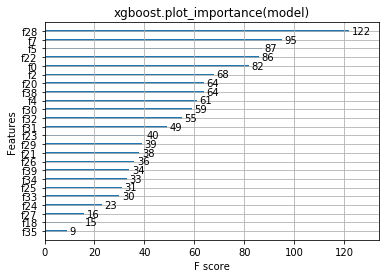

In [12]:
import seaborn as sns

xgb.plot_importance(clf)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [ ]:
xgb.plot_importance(clf, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()